In [41]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import requests
import numpy as np
model = VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None)

In [83]:
img = image.load_img('car3.jpg', target_size=(224, 224))

In [84]:
ary = image.img_to_array(img)
ary = np.expand_dims(ary, axis=0)

In [85]:
pred = model.predict(preprocess_input(ary))
result = decode_predictions(pred, top=5)[0]
    
print(result)

[('n04285008', 'sports_car', 0.8749797), ('n03100240', 'convertible', 0.075878486), ('n04037443', 'racer', 0.022687713), ('n02974003', 'car_wheel', 0.017030843), ('n03459775', 'grille', 0.007540178)]


In [59]:
model2 = VGG16(include_top=False, weights='imagenet', input_tensor=None, input_shape=None)

58900480/58889256 [==============================] - 8s 0us/step


In [220]:
dict = {}

In [224]:
from sklearn.metrics.pairwise import cosine_similarity
img_path = 'macaw1.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# Extração de características
features = model2.predict(x)

features = features.flatten()  # Transformando as características em um array 1D
features1 = features / np.linalg.norm(features)
dict[0] = img

In [225]:
from sklearn.metrics.pairwise import cosine_similarity
img_path = 'macaw2.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# Extração de características
features = model2.predict(x)

features = features.flatten()  # Transformando as características em um array 1D
features2 = features / np.linalg.norm(features)

dict[1] = img

In [226]:
from sklearn.metrics.pairwise import cosine_similarity
img_path = 'macaw3.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# Extração de características
features = model2.predict(x)

features = features.flatten()  # Transformando as características em um array 1D
features3 = features / np.linalg.norm(features)

dict[2] = img

In [118]:
from sklearn.metrics.pairwise import cosine_similarity
img_path = 'tarantula1.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# Extração de características
features = model2.predict(x)

features = features.flatten()  # Transformando as características em um array 1D
features4 = features / np.linalg.norm(features)

In [119]:
from sklearn.metrics.pairwise import cosine_similarity
img_path = 'tarantula2.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# Extração de características
features = model2.predict(x)

features = features.flatten()  # Transformando as características em um array 1D
features5 = features / np.linalg.norm(features)

In [146]:
from sklearn.metrics.pairwise import cosine_similarity, manhattan_distances
img_path = 'tarantula3.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# Extração de características
features = model2.predict(x)

features = features.flatten()  # Transformando as características em um array 1D
features6 = features / np.linalg.norm(features)

In [148]:
features_database = [features1,features2,features3,features4,features5,features6]
similarities = cosine_similarity(features6.reshape(1,-1), features_database)
similarities

array([[0.11823997, 0.1017487 , 0.13025749, 0.29030746, 0.24619251,
        0.99999976]], dtype=float32)

In [328]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [329]:
model3 = ResNet50(include_top=True, weights='imagenet')

In [331]:
img = image.load_img('images/car1.jpg', target_size=(224, 224))
ary = image.img_to_array(img)
ary = np.expand_dims(ary, axis=0)
pred = model3.predict(preprocess_input(ary))
result = decode_predictions(pred, top=5)[0]
    
print(result)

[('n04285008', 'sports_car', 0.66579825), ('n04037443', 'racer', 0.31167743), ('n02974003', 'car_wheel', 0.017078636), ('n03930630', 'pickup', 0.0029209296), ('n02930766', 'cab', 0.0008656852)]


In [191]:
features_database = [features1,features2,features3,features4,features5,features6,featuresResNet7,featuresResNet8,featuresResNet9]
similarities = cosine_similarity(featuresResNet9.reshape(1,-1), features_database)
similarities

array([[0.08161002, 0.0792233 , 0.08210467, 0.0557049 , 0.04406421,
        0.04928708, 0.37177178, 0.40625492, 1.0000002 ]], dtype=float32)

In [215]:
similarities = []
for i in range(len(features_database)):
    similarities.append((cosine_similarity(featuresResNet9.reshape(1,-1), features_database[i].reshape(1,-1)),i))

In [218]:
def takeFirst(elem):
    return elem[0]

similarities.sort(key=takeFirst, reverse=True)

In [219]:
similarities

[(array([[1.]], dtype=float32), 8),
 (array([[0.406255]], dtype=float32), 7),
 (array([[0.3717718]], dtype=float32), 6),
 (array([[0.08210468]], dtype=float32), 2),
 (array([[0.08161001]], dtype=float32), 0),
 (array([[0.07922332]], dtype=float32), 1),
 (array([[0.05570488]], dtype=float32), 3),
 (array([[0.04928708]], dtype=float32), 5),
 (array([[0.04406422]], dtype=float32), 4)]

In [338]:
import cv2
import os
def load_images_from_folder(folder):
    images = []
    index = 0
    for filename in os.listdir(folder):
        img = image.load_img(os.path.join(folder,filename), target_size=(224, 224))
        img_arr = image.img_to_array(img)
        img_arr = np.expand_dims(img_arr, axis=0)
        if img is not None:
            images.append((img_arr,img,index))
            index+=1
    return images

l = load_images_from_folder('/home/mateus/Documents/Universidade/TCC/buscador/images')



In [341]:
features = []
for i in range(len(l)):
    features.append((model2.predict(l[i][0]),i))

In [344]:
for i in range(len(l)):
    features[i] = (features[i][0].flatten(),i)
    features[i] = (features[i][0]/np.linalg.norm(features[i][0]),i)

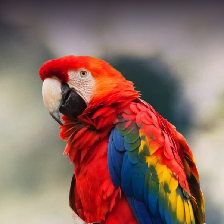

In [354]:
l[9][1]

In [373]:
similarities = []
for i in range(len(features)):
    similarities.append((cosine_similarity(features[9][0].reshape(1,-1), features[i][0].reshape(1,-1)),i))

In [374]:
def takeFirst(elem):
    return elem[0]

similarities.sort(key=takeFirst, reverse=True)

In [375]:
similarities[0][1]

9

In [376]:
similarities[1][1]

13

In [377]:
similarities[2][1]

10

In [378]:
similarities[3][1]

6

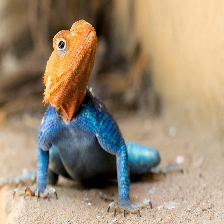

In [381]:
l[6][1]

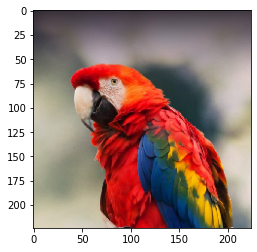

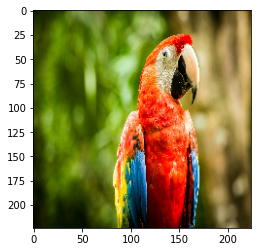

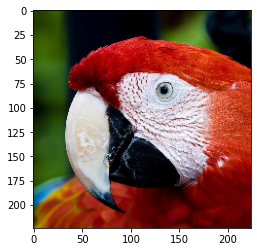

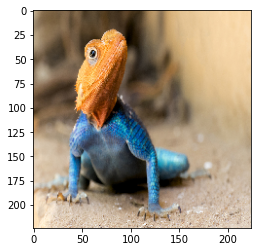

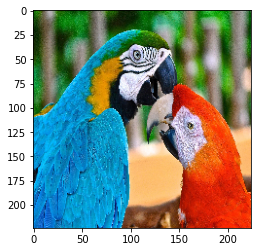

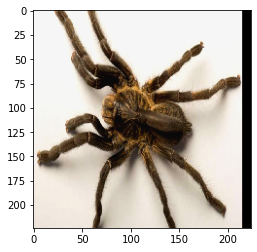

In [386]:
for i in range(6):
    j = similarities[i][1]
    plt.figure()
    plt.imshow(l[j][1]) 
    plt.show()